In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [25]:
data = pd.read_csv('../dataset/stock_price_predict/Google_Stock_Train (2010-2022).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [26]:
data['Close'] = pd.to_numeric(data.Close, errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3272 entries, 0 to 3271
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3272 non-null   object 
 1   Open       3272 non-null   float64
 2   High       3272 non-null   float64
 3   Low        3272 non-null   float64
 4   Close      3272 non-null   float64
 5   Adj Close  3272 non-null   float64
 6   Volume     3272 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 179.1+ KB


In [28]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(3272, 1)

In [29]:
X_train = []
y_train = []

for idx in range(60, 1149): # timestep, length of data
    X_train.append(trainData[idx-60:idx])
    y_train.append(trainData[idx,0])

X_train,y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1089, 60, 1)

In [31]:
model = Sequential()

model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
hist = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
35/35 - 14s - loss: 4.8522e-04 - 14s/epoch - 395ms/step
Epoch 2/20
35/35 - 4s - loss: 9.0240e-05 - 4s/epoch - 118ms/step
Epoch 3/20
35/35 - 4s - loss: 7.1837e-05 - 4s/epoch - 114ms/step
Epoch 4/20
35/35 - 4s - loss: 7.3990e-05 - 4s/epoch - 113ms/step
Epoch 5/20
35/35 - 4s - loss: 5.6726e-05 - 4s/epoch - 114ms/step
Epoch 6/20
35/35 - 4s - loss: 5.8190e-05 - 4s/epoch - 100ms/step
Epoch 7/20
35/35 - 3s - loss: 7.1593e-05 - 3s/epoch - 97ms/step
Epoch 8/20
35/35 - 3s - loss: 5.8849e-05 - 3s/epoch - 90ms/step
Epoch 9/20
35/35 - 3s - loss: 6.3935e-05 - 3s/epoch - 89ms/step
Epoch 10/20
35/35 - 3s - loss: 5.4425e-05 - 3s/epoch - 92ms/step
Epoch 11/20
35/35 - 3s - loss: 5.5201e-05 - 3s/epoch - 94ms/step
Epoch 12/20
35/35 - 3s - loss: 5.7442e-05 - 3s/epoch - 95ms/step
Epoch 13/20
35/35 - 3s - loss: 4.6646e-05 - 3s/epoch - 90ms/step
Epoch 14/20
35/35 - 3s - loss: 4.9521e-05 - 3s/epoch - 93ms/step
Epoch 15/20
35/35 - 4s - loss: 6.1452e-05 - 4s/epoch - 103ms/step
Epoch 16/20
35/35 - 3s - 

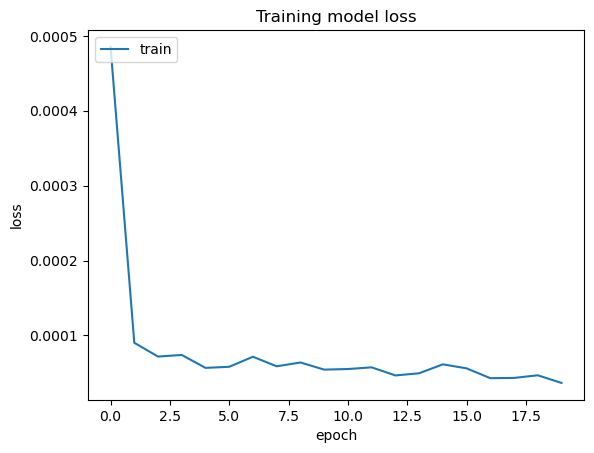

In [33]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [34]:
testData = pd.read_csv('../dataset/stock_price_predict/Google_Stock_Test (2023).csv')
testData['Close'] = pd.to_numeric(testData.Close, errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:, 4:5]
y_test = testData.iloc[60:, 0:].values

#input array for the model
inputClosing = testData.iloc[:,0:].values
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape

(143, 1)

In [35]:
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep, length):
    X_test.append(inputClosing_scaled[i-timestep:i,0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
X_test.shape

(83, 60, 1)

In [36]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 1s 23ms/step


array([[0.6706194 ],
       [0.67321694],
       [0.67396885],
       [0.6736284 ],
       [0.67291164],
       [0.67229563],
       [0.6724614 ],
       [0.6736095 ],
       [0.6754958 ],
       [0.6776508 ],
       [0.679952  ],
       [0.6825239 ],
       [0.6851277 ],
       [0.6872959 ],
       [0.68863267],
       [0.68908477],
       [0.68881065],
       [0.6881139 ],
       [0.6870558 ],
       [0.68564755],
       [0.6843719 ],
       [0.68366104],
       [0.6837225 ],
       [0.6843438 ],
       [0.6852109 ],
       [0.685973  ],
       [0.6864885 ],
       [0.6869827 ],
       [0.6876548 ],
       [0.68908113],
       [0.69216913],
       [0.69747657],
       [0.7048339 ],
       [0.7139074 ],
       [0.72423863],
       [0.73539287],
       [0.7468023 ],
       [0.7580724 ],
       [0.768546  ],
       [0.7774443 ],
       [0.78449893],
       [0.78985715],
       [0.79370683],
       [0.7961796 ],
       [0.7975269 ],
       [0.79813296],
       [0.7984881 ],
       [0.799

In [37]:
predicted_price = sc.inverse_transform(y_pred)

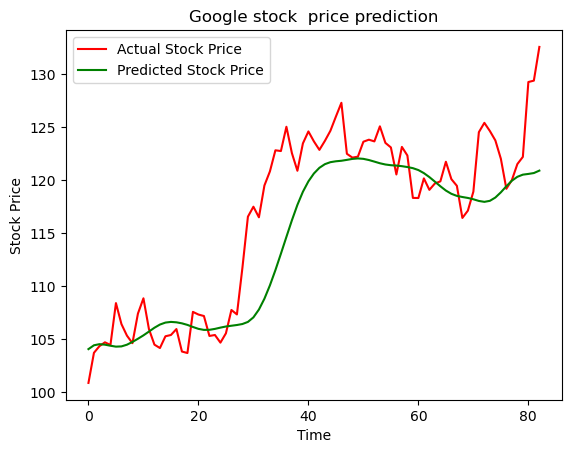

In [38]:
plt.plot(y_test, color='red',label='Actual Stock Price')
plt.plot(predicted_price, color='green', label='Predicted Stock Price')
plt.title('Google stock  price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()